# Análise Sexo da Vítima / Sexo do Criminoso

## Realizar uma investigação relacionando o sexo da vítima, sexo do criminoso e encontrar uma correlação entre a arma utilizada e o sexo do criminoso.



In [ ]:
import pandas as pd
import numpy as np

ds = pd.read_csv("database.csv")

#Checar status e tipos de variáveis
ds.info()
print('\n')
#Chegar se existe observações duplicadas. Não existem observações duplicadas.
print(ds.duplicated().value_counts())
print('\n')
#Não existe dados ausentes
ds.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88689 entries, 0 to 88688
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              88689 non-null  int64  
 1   Agency Code            88689 non-null  object 
 2   Agency Name            88689 non-null  object 
 3   Agency Type            88688 non-null  object 
 4   City                   88688 non-null  object 
 5   State                  88688 non-null  object 
 6   Year                   88688 non-null  float64
 7   Month                  88688 non-null  object 
 8   Incident               88688 non-null  float64
 9   Crime Type             88688 non-null  object 
 10  Crime Solved           88688 non-null  object 
 11  Victim Sex             88688 non-null  object 
 12  Victim Age             88688 non-null  float64
 13  Victim Race            88688 non-null  object 
 14  Victim Ethnicity       88688 non-null  object 
 15  Pe

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              1
City                     1
State                    1
Year                     1
Month                    1
Incident                 1
Crime Type               1
Crime Solved             1
Victim Sex               1
Victim Age               1
Victim Race              1
Victim Ethnicity         1
Perpetrator Sex          1
Perpetrator Age          1
Perpetrator Race         1
Perpetrator Ethnicity    1
Relationship             1
Weapon                   1
Victim Count             1
Perpetrator Count        1
Record Source            1
dtype: int64

In [7]:
#Avalia as categorias das variáveis 'Crime Solved', 'Perpetrator Sex' e 'Victim Sex'
print(ds['Crime Solved'].value_counts())
print('\n')
print(ds['Perpetrator Sex'].value_counts())
print('\n')
print(ds['Victim Sex'].value_counts())

Yes    65078
No     23610
Name: Crime Solved, dtype: int64


Male       55945
Unknown    23610
Female      9133
Name: Perpetrator Sex, dtype: int64


Male       68510
Female     20106
Unknown       72
Name: Victim Sex, dtype: int64


In [8]:
#Considerar apenas os crimes em que se conhece os sexos das vítimas e criminosos e que foram solucionados pela polícia
dsTrabalho = ds[(ds['Crime Solved']=='Yes') & (ds['Perpetrator Sex']!='Unknown') & (ds['Victim Sex']!='Unknown')]
dsTrabalho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65066 entries, 0 to 88687
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              65066 non-null  int64  
 1   Agency Code            65066 non-null  object 
 2   Agency Name            65066 non-null  object 
 3   Agency Type            65066 non-null  object 
 4   City                   65066 non-null  object 
 5   State                  65066 non-null  object 
 6   Year                   65066 non-null  float64
 7   Month                  65066 non-null  object 
 8   Incident               65066 non-null  float64
 9   Crime Type             65066 non-null  object 
 10  Crime Solved           65066 non-null  object 
 11  Victim Sex             65066 non-null  object 
 12  Victim Age             65066 non-null  float64
 13  Victim Race            65066 non-null  object 
 14  Victim Ethnicity       65066 non-null  object 
 15  Pe

In [9]:
#Avalia a existência de informações sobre as idades das vítimas que foram mal colocadas.
#dsTrabalho.boxplot(column=['Victim Age'])
dsTrabalho['Victim Age'].describe()

count    65066.000000
mean        33.983955
std         18.393863
min          0.000000
25%         23.000000
50%         30.000000
75%         42.000000
max        998.000000
Name: Victim Age, dtype: float64

In [10]:
#Note que existe uma pessoa (vítima) com idade 998. Deve-se retirar essa observação do dataset.
print(dsTrabalho[dsTrabalho['Victim Age']>65]['Victim Age'].value_counts())
dsTrabalho = dsTrabalho[dsTrabalho['Victim Age']!=998]

99.0     603
67.0     249
68.0     233
70.0     199
72.0     194
69.0     193
71.0     190
66.0     182
76.0     151
73.0     149
75.0     142
74.0     128
79.0     110
77.0     109
78.0     101
82.0      98
80.0      92
81.0      90
84.0      71
86.0      66
83.0      60
85.0      57
87.0      31
88.0      30
90.0      27
89.0      25
92.0      16
91.0      16
93.0      13
94.0       9
95.0       5
998.0      3
97.0       2
Name: Victim Age, dtype: int64


In [11]:
#Note que os valores da variável 'Perpetrator Age' não tem um tipo numérico definido e são tratados como objeto.
#Também, avalia a existência de informações sobre as idades dos criminosos que foram mal colocadas.

#Transformando dados da variável 'Perpetrator Age' para inteiro.
dsTrabalho['Perpetrator Age'] = dsTrabalho['Perpetrator Age'].astype('int')
print(dsTrabalho['Perpetrator Age'].describe())
print('\n')

#Nota-se que algumas idades dos criminosos não fazem sentido, por exemplo, idade 0 e idade 1.
#Nesse caso, será considerado apenas os crimes cujas idades dos criminosos é maior ou igual a 18 anos.
print(dsTrabalho[dsTrabalho['Perpetrator Age']<18]['Perpetrator Age'].value_counts())
print('\n')
dsTrabalho = dsTrabalho[dsTrabalho['Perpetrator Age']>=18]
print(dsTrabalho['Perpetrator Age'].describe())

count    65063.000000
mean        30.516084
std         13.560675
min          0.000000
25%         22.000000
50%         28.000000
75%         37.000000
max         99.000000
Name: Perpetrator Age, dtype: float64


0     1928
17    1659
16    1127
15     640
14     321
13     146
12      78
11      39
10      23
9       19
6        9
7        7
5        7
3        5
8        3
4        3
Name: Perpetrator Age, dtype: int64


count    59049.000000
mean        32.537147
std         12.359116
min         18.000000
25%         23.000000
50%         29.000000
75%         38.000000
max         99.000000
Name: Perpetrator Age, dtype: float64


## Encontrar um padrão dos tipos de armas mais usadas e  a sua relação com a raça da vítima e a raça do criminoso.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
print('Weapon  = ', dsTrabalho['Weapon'].unique())

Weapon  =  ['Strangulation' 'Rifle' 'Knife' 'Firearm' 'Shotgun' 'Blunt Object' 'Fall'
 'Handgun' 'Drowning' 'Unknown' 'Suffocation' 'Fire' 'Drugs' 'Explosives'
 'Gun' 'Poison']


In [96]:
dsTrabalho['Weapon_'] = 1
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Strangulation'),'Weapon_'] = 'Estrangular'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Rifle'),'Weapon_'] = 'Carabina'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Knife'),'Weapon_'] = 'Faca'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Firearm'),'Weapon_'] = 'Arma de Fogo'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Shotgun'),'Weapon_'] = 'Espingarda'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Blunt Object'),'Weapon_'] = 'Objeto contundente'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Fall'),'Weapon_'] = 'Queda'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Handgun'),'Weapon_'] = 'Revólver'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Drowning'),'Weapon_'] = 'Afogamento'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Unknown'),'Weapon_'] = 'Desconhecido'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Suffocation'),'Weapon_'] = 'Asfixia'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Fire'),'Weapon_'] = 'Incêndio'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Drugs'),'Weapon_'] = 'Drogas'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Explosives'),'Weapon_'] = 'Explosivos'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Gun'),'Weapon_'] = 'Pistola'
dsTrabalho.loc[(dsTrabalho['Weapon'] == 'Poison'),'Weapon_'] = 'Veneno'


In [97]:
print('Weapon_  = ', dsTrabalho['Weapon_'].unique())

Weapon_  =  ['Estrangular' 'Carabina' 'Faca' 'Espingarda' 'Objeto contundente' 'Queda'
 'Revólver' 'Afogamento' 'Arma de Fogo' 'Asfixia' 'Incêndio' 'Drogas'
 'Explosivos' 'Pistola' 'Veneno']


In [16]:
print('Victim Race  = ', dsTrabalho['Victim Race'].unique())

Victim Race  =  ['White' 'Native American/Alaska Native' 'Black' 'Unknown'
 'Asian/Pacific Islander']


In [17]:
dsTrabalho['Victim Race_'] = 1
dsTrabalho.loc[(dsTrabalho['Victim Race'] == 'White'),'Victim Race_'] = 'Branco'
dsTrabalho.loc[(dsTrabalho['Victim Race'] == 'Native American/Alaska Native'),'Victim Race_'] = 'Nativo'
dsTrabalho.loc[(dsTrabalho['Victim Race'] == 'Black'),'Victim Race_'] = 'Afro-americano'
dsTrabalho.loc[(dsTrabalho['Victim Race'] == 'Unknown'),'Victim Race_'] = 'Desconhecido'
dsTrabalho.loc[(dsTrabalho['Victim Race'] == 'Asian/Pacific Islander'),'Victim Race_'] = 'Asiático'

In [18]:
print('Victim Race_  = ', dsTrabalho['Victim Race_'].unique())

Victim Race_  =  ['Branco' 'Nativo' 'Afro-americano' 'Desconhecido' 'Asiático']


In [19]:
print('Perpetrator Race  = ', dsTrabalho['Perpetrator Race'].unique())

Perpetrator Race  =  ['White' 'Black' 'Unknown' 'Native American/Alaska Native'
 'Asian/Pacific Islander']


In [20]:
dsTrabalho['Perpetrator Race_'] = 1
dsTrabalho.loc[(dsTrabalho['Perpetrator Race'] == 'White'),'Perpetrator Race_'] = 'Branco'
dsTrabalho.loc[(dsTrabalho['Perpetrator Race'] == 'Native American/Alaska Native'),'Perpetrator Race_'] = 'Nativo'
dsTrabalho.loc[(dsTrabalho['Perpetrator Race'] == 'Black'),'Perpetrator Race_'] = 'Afro-americano'
dsTrabalho.loc[(dsTrabalho['Perpetrator Race'] == 'Unknown'),'Perpetrator Race_'] = 'Desconhecido'
dsTrabalho.loc[(dsTrabalho['Perpetrator Race'] == 'Asian/Pacific Islander'),'Perpetrator Race_'] = 'Asiático'

In [21]:
print('Perpetrator Race_  = ', dsTrabalho['Perpetrator Race_'].unique())

Perpetrator Race_  =  ['Branco' 'Afro-americano' 'Desconhecido' 'Nativo' 'Asiático']


O dataset apresenta 16 formas que os autores utilizaram para praticaram os crises. 

In [98]:
dsTrabalho['Weapon_'].value_counts()

Revólver              27404
Faca                  11810
Objeto contundente     6363
Espingarda             5048
Carabina               3606
Arma de Fogo           1219
Estrangular             671
Incêndio                586
Asfixia                 276
Afogamento              147
Pistola                  82
Drogas                   58
Veneno                   56
Queda                    35
Explosivos               24
Name: Weapon_, dtype: int64

In [23]:
indexes = dsTrabalho[dsTrabalho["Weapon_"] == 'Desconhecido'].index
dsTrabalho = dsTrabalho.drop(indexes)

In [24]:
print('Weapon_  = ', dsTrabalho['Weapon_'].unique())

Weapon_  =  ['Estrangular' 'Carabina' 'Faca' 'Arma de Fogo' 'Espingarda'
 'Objeto contundente' 'Queda' 'Pistola' 'Afogamento' 'Asfixia' 'Incêndio'
 'Drogas' 'Explosivos' 'Revólver' 'Veneno']


In [25]:
indexes = dsTrabalho[dsTrabalho["Victim Race_"] == 'Desconhecido'].index
dsTrabalho = dsTrabalho.drop(indexes)

In [26]:
print('Perpetrator Race_  = ', dsTrabalho['Victim Race_'].unique())

Perpetrator Race_  =  ['Branco' 'Nativo' 'Afro-americano' 'Asiático']


In [27]:
indexes = dsTrabalho[dsTrabalho["Perpetrator Race_"] == 'Desconhecido'].index
dsTrabalho = dsTrabalho.drop(indexes)

In [28]:
print('Perpetrator Race_  = ', dsTrabalho['Perpetrator Race_'].unique())

Perpetrator Race_  =  ['Branco' 'Afro-americano' 'Nativo' 'Asiático']


In [99]:
dsTrabalho['Weapon_'].value_counts()

Revólver              27404
Faca                  11810
Objeto contundente     6363
Espingarda             5048
Carabina               3606
Arma de Fogo           1219
Estrangular             671
Incêndio                586
Asfixia                 276
Afogamento              147
Pistola                  82
Drogas                   58
Veneno                   56
Queda                    35
Explosivos               24
Name: Weapon_, dtype: int64

In [30]:
dsTrabalho['Weapon'].value_counts()

Handgun          27404
Knife            11810
Blunt Object      6363
Shotgun           5048
Rifle             3606
Firearm           1219
Strangulation      671
Fire               586
Suffocation        276
Drowning           147
Gun                 82
Drugs               58
Poison              56
Fall                35
Explosives          24
Name: Weapon, dtype: int64

AxesSubplot(0.08,0.07;0.87x0.81)


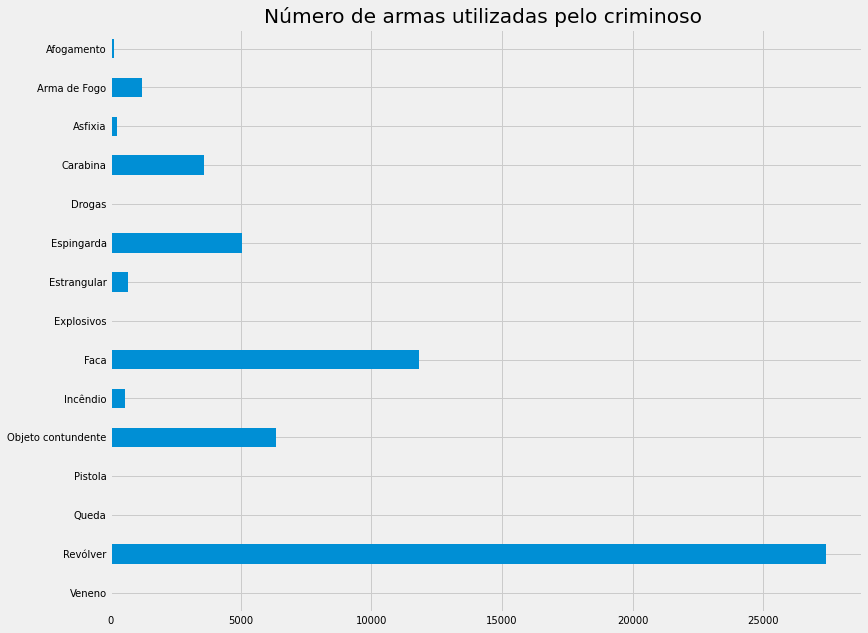

In [100]:
plt.style.use('fivethirtyeight')

grau = pd.DataFrame(dsTrabalho, columns = ['Weapon_']) 
count_grau = grau.stack().value_counts()
homicides = count_grau.sort_index(axis=0, ascending=False)
#plot the total of homicides
print(homicides.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Número de armas utilizadas pelo criminoso '))

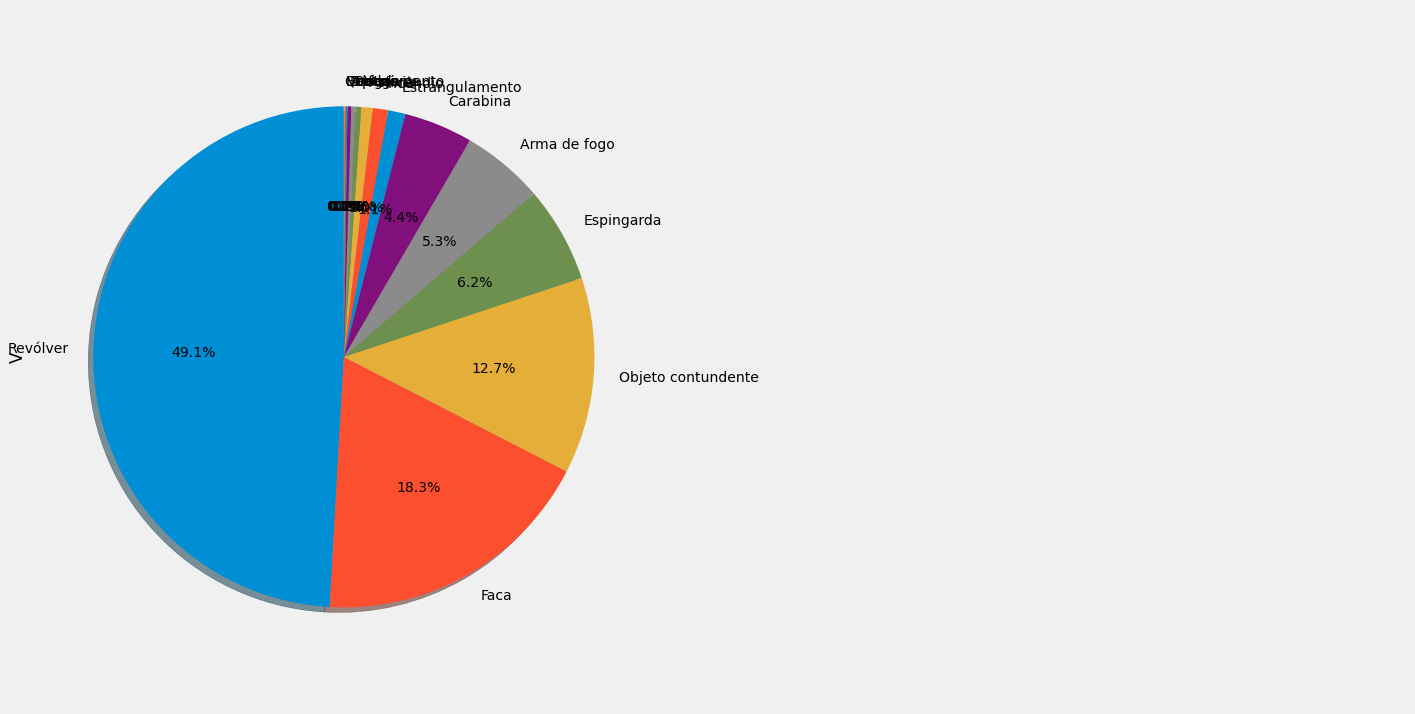

In [114]:
# sample data
raw_data = {'Arma': ['Revólver',
'Faca',
'Objeto contundente',
'Espingarda',
'Arma de fogo',
'Carabina',
'Estrangulamento',
'Incêndio',
'Asfixia',
'Afogamento',
'Pistola',
'Drogas',
'Veneno',
'Explosivos',
'Queda'],
        'V' :[181749, 67874, 46878, 22902, 19703, 16436, 4138, 3662, 2709, 1324, 1035, 890, 360, 349, 149]}
df = pd.DataFrame(raw_data, columns = ['Arma', 'V'])
#df['total_arrests'] = df['Grau'] + df['valores']

plt.figure(figsize=(22,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'V', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=True, labels=df['Arma'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)

plt.axis('off')
#tbl = table(ax2, df, loc='center')
#tbl.auto_set_font_size(False)
#tbl.set_fontsize(14)
plt.show()


In [106]:
dsTrabalho.groupby(['Victim Race_', 'Perpetrator Race_', 'Weapon_', ]).size().reset_index(name="Count").sort_values(by='Count', ascending=False).head(100)

,Victim Race_,Perpetrator Race_,Weapon_,Count
107,Branco,Branco,Revólver,12124
13,Afro-americano,Afro-americano,Revólver,12102
8,Afro-americano,Afro-americano,Faca,5483
102,Branco,Branco,Faca,5006
104,Branco,Branco,Objeto contundente,3400
...,...,...,...,...
36,Afro-americano,Nativo,Objeto contundente,4
47,Asiático,Asiático,Arma de Fogo,4
39,Asiático,Afro-americano,Carabina,4
82,Branco,Afro-americano,Queda,4


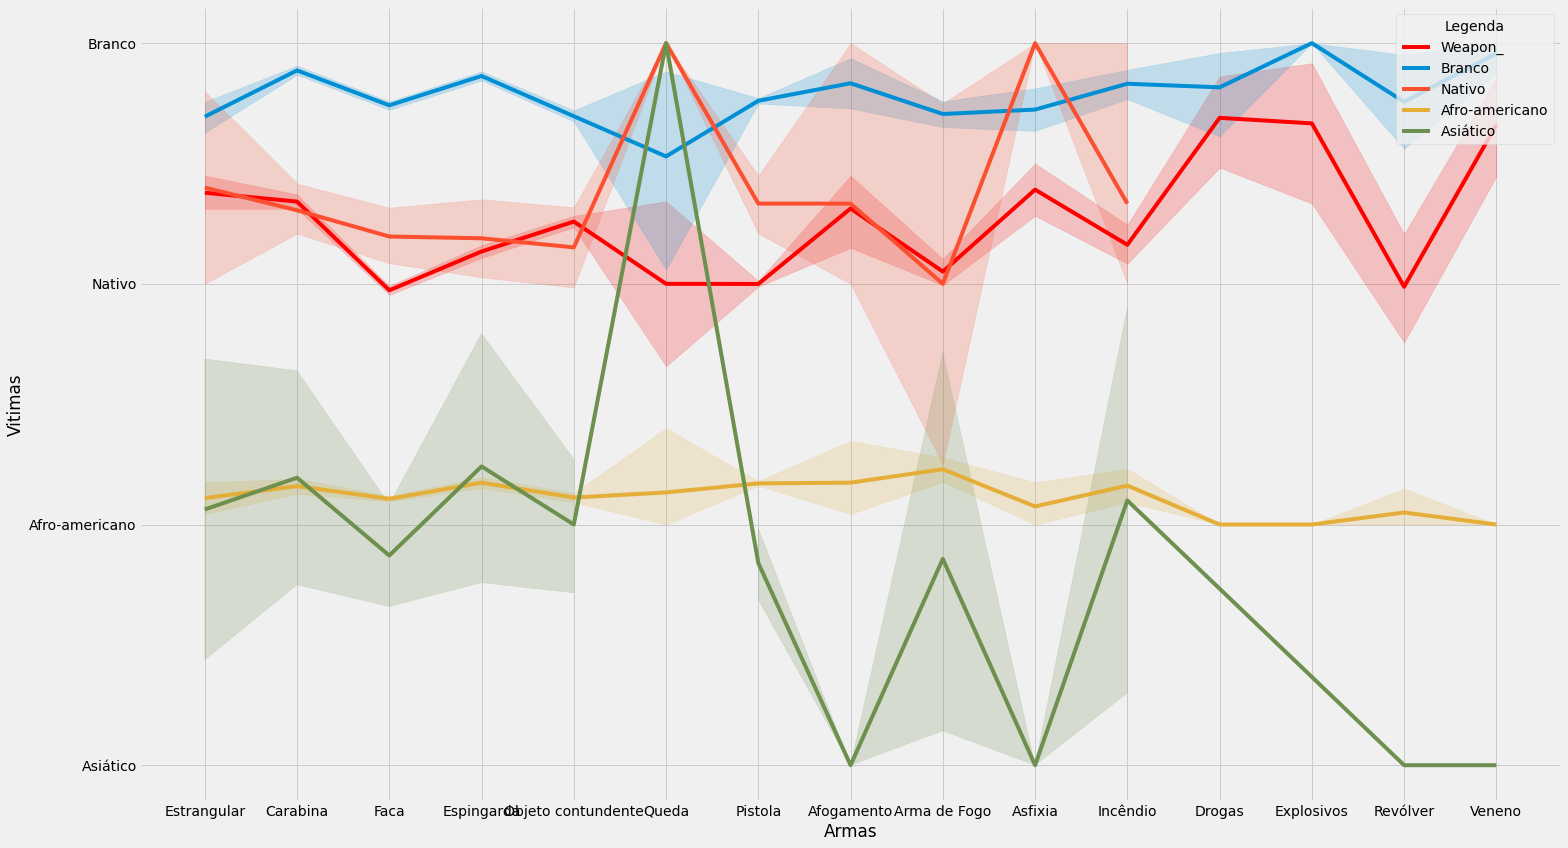

In [ ]:
fig, axs = plt.subplots(figsize=(22,12))

# Plotando a taxa de desemprego
sns.lineplot(data=dsTrabalho,
            x='Weapon_',
            y='Victim Race_',
            color='red',
            ax=axs,
            label='Weapon_')

#axs.set_title('Comparação das notas de classificação de cursos e gênero')
axs.set_xlabel('Armas')
axs.set_ylabel('Vitimas')
#axs.set_xlim(1999, 2014)
#axs.grid()


sns.lineplot(data=dsTrabalho,
            x='Weapon_',
            y='Perpetrator Race_',
            ax=axs,
            hue='Victim Race_')

axs.legend(title="Legenda",
             loc='upper right')
plt.tight_layout()
plt.show()

In [108]:
def plot_frequency(x,data):
    plt.subplot(2, 1, 1)
    sns.countplot(x=x, data=data,
                              order=data[x].value_counts().iloc[:4].index)
    plt.subplot(2, 1, 2)
    sns.countplot(x=x, data=data,
                              order=data[x].value_counts().iloc[4:8].index)        
    plt.show()

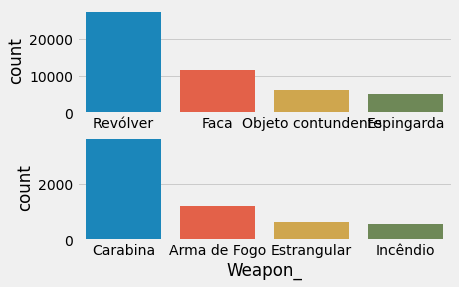

In [109]:
plot_frequency('Weapon_',dsTrabalho)

Nota-se que o tipo de arma mais utilizada nos casos foi a arma de fogo e, logo em seguida, a faca. 

Os crimes cometidos entre raças iguais foram os mais registrados durante todo os anos que o dataset mostra nos dados

> Bloco com recuo

